#Employee BurnOut Prediction

# Importing necessary libraries

In [2]:
#Importing libraries
import   pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle as pickle
import os



# Loading Dataset

In [3]:
data=pd.read_excel(r"/content/employee_burnout_analysis-AI.xlsx")

# Data Overview

In [4]:
data.head()

,Employee ID,DateofJoining,Gender,Company Type,WFHSetupAvailable,Designation,ResourceAllocation,MentalFatigueScore,BurnRate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


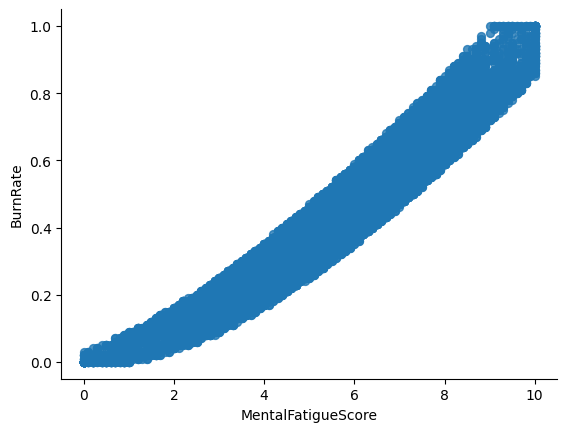

In [ ]:
# @title MentalFatigueScore vs BurnRate

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='MentalFatigueScore', y='BurnRate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
data.tail()

,Employee ID,DateofJoining,Gender,Company Type,WFHSetupAvailable,Designation,ResourceAllocation,MentalFatigueScore,BurnRate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [6]:
data.describe()

,DateofJoining,Designation,ResourceAllocation,MentalFatigueScore,BurnRate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [7]:
data.columns.tolist()

['Employee ID',
 'DateofJoining',
 'Gender',
 'Company Type',
 'WFHSetupAvailable',
 'Designation',
 'ResourceAllocation',
 'MentalFatigueScore',
 'BurnRate']

In [ ]:
data.nunique()

Employee ID           22750
DateofJoining           366
Gender                    2
Company Type              2
WFHSetupAvailable         2
Designation               6
ResourceAllocation       10
MentalFatigueScore      101
BurnRate                101
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Employee ID         22750 non-null  object        
 1   DateofJoining       22750 non-null  datetime64[ns]
 2   Gender              22750 non-null  object        
 3   Company Type        22750 non-null  object        
 4   WFHSetupAvailable   22750 non-null  object        
 5   Designation         22750 non-null  int64         
 6   ResourceAllocation  21369 non-null  float64       
 7   MentalFatigueScore  20633 non-null  float64       
 8   BurnRate            21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

Employee ID              0
DateofJoining            0
Gender                   0
Company Type             0
WFHSetupAvailable        0
Designation              0
ResourceAllocation    1381
MentalFatigueScore    2117
BurnRate              1124
dtype: int64

In [ ]:
data.isnull().sum().values.sum()

0

In [ ]:
data.corr(numeric_only=True)['BurnRate'][:-1]

Designation           0.737556
ResourceAllocation    0.856278
MentalFatigueScore    0.944546
Name: BurnRate, dtype: float64

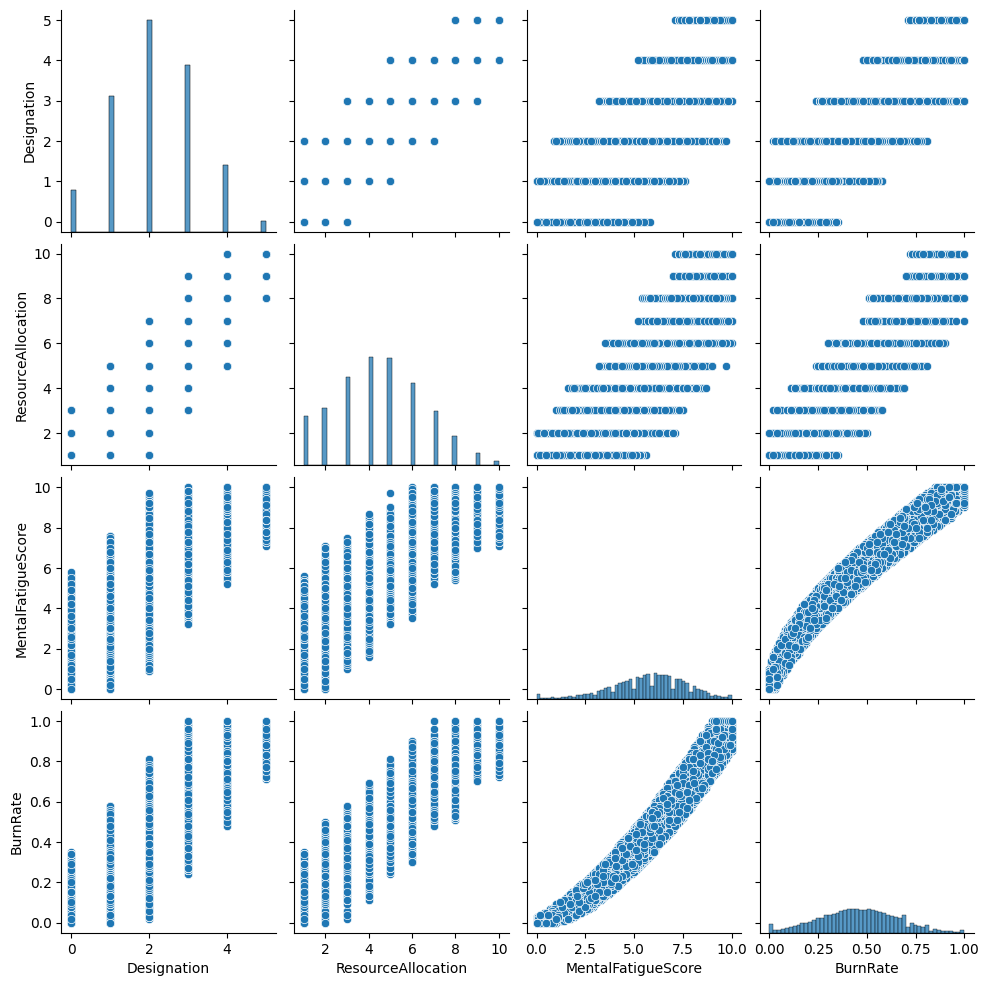

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(18590, 9)

In [ ]:
data.dtypes

Employee ID                   object
DateofJoining         datetime64[ns]
Gender                        object
Company Type                  object
WFHSetupAvailable             object
Designation                    int64
ResourceAllocation           float64
MentalFatigueScore           float64
BurnRate                     float64
dtype: object

In [ ]:
data = data.drop('Employee ID', axis = 1)

min date 2008-01-01 00:00:00
min date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

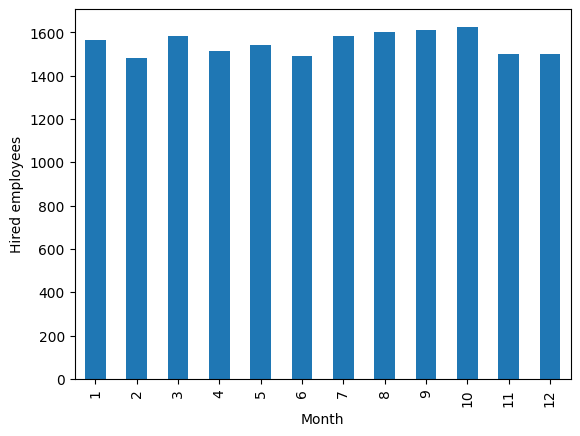

In [ ]:
print(f"min date {data['DateofJoining'].min()}")
print(f"min date {data['DateofJoining'].max()}")
data_month=data.copy()
data_month["DateofJoining"] = data_month['DateofJoining'].astype("datetime64[ns]")  # Specify time unit as nanoseconds
data_month["DateofJoining"].groupby(data_month['DateofJoining'].dt.month).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")

In [ ]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
# Specify time unit as nanoseconds when converting to datetime64
data["Days"] = data['DateofJoining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [10]:
data=data.drop(columns=['MentalFatigueScore'])

In [11]:
data

,Employee ID,DateofJoining,Gender,Company Type,WFHSetupAvailable,Designation,ResourceAllocation,BurnRate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,0.52
...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,0.52


In [ ]:
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['BurnRate']
print(correlation)

Designation           0.736412
ResourceAllocation    0.855005
MentalFatigueScore    0.944389
BurnRate              1.000000
Days                  0.000309
Name: BurnRate, dtype: float64


In [ ]:
data.corr(numeric_only=True)['BurnRate'][:]

Designation           0.736412
ResourceAllocation    0.855005
MentalFatigueScore    0.944389
BurnRate              1.000000
Days                  0.000309
Name: BurnRate, dtype: float64

In [ ]:
data = data.drop(['DateofJoining','Days'], axis = 1)

In [ ]:
data.head()

,Gender,Company Type,WFHSetupAvailable,Designation,ResourceAllocation,MentalFatigueScore,BurnRate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


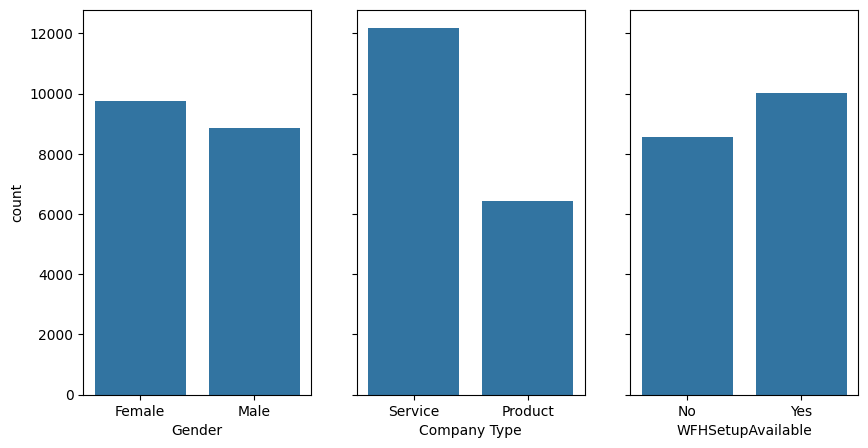

In [ ]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

In [ ]:
# Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    # Add debugging steps here to investigate why the columns are missing.
    # For example, print the existing columns:
    print(data.columns)

Error: One or more of the specified columns are not present in the DataFrame.
Index(['Gender', 'Company Type', 'WFHSetupAvailable', 'Designation',
       'ResourceAllocation', 'MentalFatigueScore', 'BurnRate'],
      dtype='object')


In [ ]:
# Split df into X and y
y = data['BurnRate']
X = data.drop('BurnRate', axis=1)

In [12]:
x=data.drop(columns=['BurnRate'])

In [15]:
#categorical into numerical values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Employee ID']=encoder.fit_transform(data['Employee ID']) #7categories 0-6
data['DateofJoining']=encoder.fit_transform(data['DateofJoining'])
data['Gender']=encoder.fit_transform(data['Gender'])
data['Company Type']=encoder.fit_transform(data['Company Type'])
data['WFHSetupAvailable']=encoder.fit_transform(data['WFHSetupAvailable'])
data['Designation']=encoder.fit_transform(data['Designation'])
data['ResourceAllocation']=encoder.fit_transform(data['ResourceAllocation'])
data['BurnRate']=encoder.fit_transform(data['BurnRate'])

In [16]:
data

,Employee ID,DateofJoining,Gender,Company Type,WFHSetupAvailable,Designation,ResourceAllocation,BurnRate
0,7722,273,0,1,0,2,2,16
1,21062,334,1,1,1,1,1,36
2,2381,69,0,0,1,2,10,49
3,10790,307,1,1,1,1,0,20
4,6810,205,0,1,0,3,6,52
...,...,...,...,...,...,...,...,...
22745,4208,364,0,1,0,1,2,41
22746,14934,18,0,0,1,3,5,59
22747,22181,309,1,1,1,3,6,72
22748,16875,9,0,1,0,2,4,52


In [17]:
x=data.drop(columns=['BurnRate'])

In [18]:
x

,Employee ID,DateofJoining,Gender,Company Type,WFHSetupAvailable,Designation,ResourceAllocation
0,7722,273,0,1,0,2,2
1,21062,334,1,1,1,1,1
2,2381,69,0,0,1,2,10
3,10790,307,1,1,1,1,0
4,6810,205,0,1,0,3,6
...,...,...,...,...,...,...,...
22745,4208,364,0,1,0,1,2
22746,14934,18,0,0,1,3,5
22747,22181,309,1,1,1,3,6
22748,16875,9,0,1,0,2,4


In [19]:
#normalisation
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [20]:
x

array([[0.33944349, 0.74794521, 0.        , ..., 0.        , 0.4       ,
        0.2       ],
       [0.92584289, 0.91506849, 1.        , ..., 1.        , 0.2       ,
        0.1       ],
       [0.10466394, 0.1890411 , 0.        , ..., 1.        , 0.4       ,
        1.        ],
       ...,
       [0.97503187, 0.84657534, 1.        , ..., 1.        , 0.6       ,
        0.6       ],
       [0.74179085, 0.02465753, 0.        , ..., 0.        , 0.4       ,
        0.4       ],
       [0.82847598, 0.01369863, 1.        , ..., 0.        , 0.6       ,
        0.5       ]])

In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Convert categorical features to numerical using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns in training and testing sets (handle potential missing categories)
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [ ]:
import os
import pickle

scaler_filename = '../models/scaler.pkl'
# Create the 'models' directory if it doesn't exist
os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)

# Use pickle to save the scaler to the file
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
X_train

,Designation,ResourceAllocation,MentalFatigueScore,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFHSetupAvailable_No,WFHSetupAvailable_Yes
8977,0.723327,0.250185,-0.061773,-1.051505,1.051505,-0.724706,0.724706,1.082297,-1.082297
14115,-0.159330,0.250185,-0.941481,0.951018,-0.951018,-0.724706,0.724706,1.082297,-1.082297
8797,0.723327,0.250185,0.973179,0.951018,-0.951018,-0.724706,0.724706,1.082297,-1.082297
1173,-1.041987,-1.214568,-0.579248,0.951018,-0.951018,1.379869,-1.379869,1.082297,-1.082297
1941,-0.159330,0.738436,1.180169,-1.051505,1.051505,1.379869,-1.379869,-0.923961,0.923961
...,...,...,...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,0.951018,-0.951018,1.379869,-1.379869,-0.923961,0.923961
21179,0.723327,0.250185,-1.044976,-1.051505,1.051505,-0.724706,0.724706,-0.923961,0.923961
6327,0.723327,0.250185,0.093470,-1.051505,1.051505,-0.724706,0.724706,1.082297,-1.082297
14933,-0.159330,0.250185,0.714441,-1.051505,1.051505,-0.724706,0.724706,1.082297,-1.082297


In [ ]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: BurnRate, Length: 13013, dtype: float64

In [ ]:
import os
import pickle

#saving the processed data
path = '../data/processed/'

# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)

X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)

In [ ]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.045950320326447726
R-squared Score: 0.918822674247248
